<a href="https://colab.research.google.com/github/zangell44/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# 0.Data Cleaning and Enhancement

Checking for null values, some minor feature engineering, etc.

In [0]:
assert 'object' not in df.dtypes, 'Please ensure all data types are integer or float'

In [0]:
assert df.isnull().sum().sum() == 0, 'Please correct null values'

Some of these variables seem more categorical or ordinal in nature than numeric. Let's look at the unique values for some of the suspicious ones.

The only obvious exceptions to this are 
- year, likely either the year made or the year sold
- mileage, likely the thousands of miles driven at time of sale
- engV, likely the volume of the engine in some unit such as liters

In [122]:
print ('Unique values of drive', df['drive'].unique())
print ('Unique values of registration', df['registration'].unique())
print ('Unique values of engType', df['engType'].unique())
print ('Unique values of body', df['body'].unique())
print ('Unique values of make', df['make'].unique())

Unique values of drive [1 2 0]
Unique values of registration [1 0]
Unique values of engType [1 3 0 2]
Unique values of body [0 3 2 5 4 1]
Unique values of make [23 50 55 30 59  5 77  4 13 37 52 39 58 74 33 56 12 67 42 17 49 43 34 70
 76  1 68 57 71 11  7 78 80 14 19 22 38 69 66 47 15 32 26 48  6 10  0  3
 73 61 24 25 45 53 20 75 72 81 44 51 28 27 54 63 41  2 21  8 16 60 46 64
 36 65 40 18 29 62 82 35 31 79  9]


Based on the above, the only feature I would feel comfortable leaving is registration, which is likely a binary variable indicating whether or not the car is registered. (It is Eastern Europe after all, and rumor has it many cars are stolen out there lol)

On the other hand, drive, engType, body, and make all seem to be categorical variables that we should one hot encode. I have no reason to assume they are in any order.

In [123]:
df = pd.get_dummies(df, prefix_sep="__",
                   columns=['drive', 'engType', 'body', 'make'],
                   drop_first=True) # get k-1 dummies
df.head()

,price,mileage,engV,registration,year,drive__1,drive__2,engType__1,engType__2,engType__3,...,make__73,make__74,make__75,make__76,make__77,make__78,make__79,make__80,make__81,make__82
0,15500.0,68,2.5,1,2010,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20500.0,173,1.8,1,2011,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,135,5.5,1,2008,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,17800.0,162,1.8,1,2012,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16600.0,83,2.0,1,2013,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


This obviously multiplies our feature space quite a bit, but its the only way I feel comfortable handling the data without an explicit explanation of the features.

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
features = df.columns.drop('price')
target = 'price'

X = df[features]
y = df[target]

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=7)

Let's take a quick peek at the distribution of price.

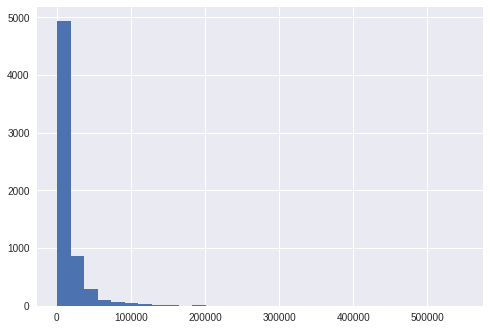

In [126]:
y_train.hist(bins=30);

The price variable is heavily skewed to the right, which will be tough for our regression to fit. The log transformation in part 2 should help.

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [127]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [128]:
print ('Model Intercept', lr.intercept_)
for i in range(X_train.shape[1]):
  print ('Coefficient of feature name ' + str(X_train.columns[i]), lr.coef_[i])

Model Intercept -1457162.0734267577
Coefficient of feature name mileage -58.12542756272534
Coefficient of feature name engV 119.3642688796192
Coefficient of feature name registration 7100.270346377771
Coefficient of feature name year 732.7692153473529
Coefficient of feature name drive__1 11577.143660508764
Coefficient of feature name drive__2 -1911.3104165942168
Coefficient of feature name engType__1 -3787.974760575429
Coefficient of feature name engType__2 -3117.9530802244735
Coefficient of feature name engType__3 -2369.8594568993503
Coefficient of feature name body__1 -2871.155868172091
Coefficient of feature name body__2 -598.7475755102478
Coefficient of feature name body__3 -618.7839734919867
Coefficient of feature name body__4 -2665.2802584986334
Coefficient of feature name body__5 -2846.6138433971537
Coefficient of feature name make__1 8572.06071362968
Coefficient of feature name make__2 -12889.474686377387
Coefficient of feature name make__3 78700.64874024753
Coefficient of feat

## 1.5 Use the test data to make predictions

In [0]:
y_pred = lr.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [130]:
print ('Training Data Performance:')
print ('Train R-squared:', lr.score(X_train, y_train))
print ('Train RMSE:', mean_squared_error(lr.predict(X_train), y_train)**0.5)

print ('\nTesting Data Performance:')
print ('Test R-squared:', lr.score(X_test, y_test))
print ('Test RMSE:', mean_squared_error(y_pred, y_test)**0.5)

Training Data Performance:
Train R-squared: 0.5534340187362048
Train RMSE: 17252.083614690455

Testing Data Performance:
Test R-squared: 0.35563445699046314
Test RMSE: 15857.54083069887


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The coefficient corresponding to the 'year' feature is ~732.77.

Assuming 'year' indicates the year a car was made, we should interpret the coefficient to mean that on average, for each year newer a car is, price will increase by 732.77 units. In this case, the currency may be the Ukrainian hryvnia, or the currency may have been translated.

## 1.8 How should we interpret the Root-Mean-Square Error?

Root Mean Square Error is a measure of how well a model fits the observed data. Lower RMSE indicates better fit.

Ideally, our prediction error (residuals) will follow a normal distribution around a mean of zero. RMSE is the standard deviation of unexplained residual distribution for the regression.

RMSE is given in the units of the target variable, and therefore depends on the selection of target variable. In the log-linear regression below, for example, RMSE will almost certainly be lower because our new target is log(price).

## 1.9 How should we interpret the $R^2$?

R-squared is interpreted as the percent of variance in the target variable explained by the features. 

In our training data, we are able to explain around 55% of the total variance in price. In our test data, we do less well, explaining around 36% of the total variance in price.


# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
log_y = np.log(y)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

For this section, I'm lmited to the features I have not already one hot encoded: mileage, engV, and year.

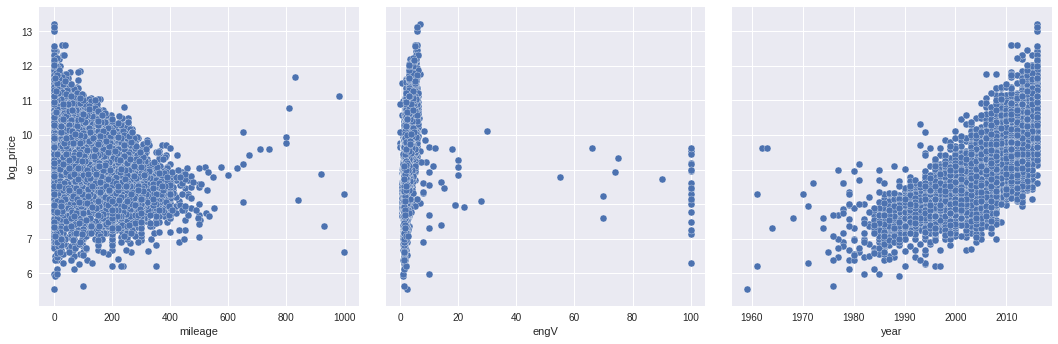

In [132]:
# put everything back in a dataframe for easier plotting
df_log = X
df_log['log_price'] = log_y

features_numeric = ['mileage', 'engV', 'year']

# plot against numeric features
sns.pairplot(data=df_log, y_vars=['log_price'], x_vars=features_numeric, size=5);

From the above, 'year' is a clear candidate for including a squared term. The relationship between year and log(price) seems to indicate a non-linear factor, where cars become increasingly less valuable as they get older.

Further, something very strange is going on with 'engV'. If we continue to interpret the engine volume in liters, its seems possible that two different types of vehicles entirely are being sold, some are likely industrial vehicles. We need to do something to segment these out.

Mileage is puzzling, as we would expect to see a downward trend when mileage increses. There should be no benefit to buying a car that has been driven more.

Let's first explore the distribution of mileage.

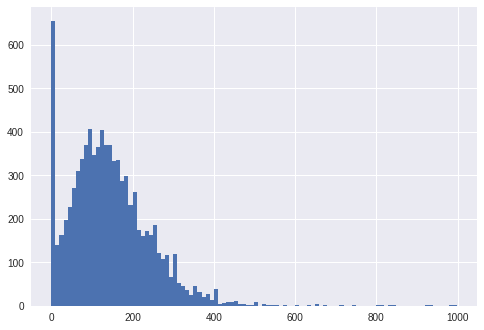

In [133]:
# distribution of mileage
df_log['mileage'].hist(bins=100);

Seems like there is **a lot** of cars with very little mileage, is it possible we have zeroes hiding in our data or that the data has been manipulated?

In [134]:
df_log['mileage'].value_counts(sort=False)

0      282
8        9
16      18
24      13
32      15
40      38
48      19
56      31
64      24
72      22
80      66
88      38
96      27
104     19
112     44
120     79
128     34
136     26
144     23
152     31
160    106
168     28
176     24
184     21
192     10
200    160
208      9
216     10
224      4
232     10
      ... 
159     18
167     37
175     38
183     15
191     12
199     18
207     15
215     32
223     10
231      9
239      5
247     13
255     14
263     11
271      4
279      2
287     11
295      7
303      3
311      3
319      3
327      4
335      6
367      3
375      4
407      1
423      1
535      1
575      1
999      2
Name: mileage, Length: 435, dtype: int64

Maybe it would be best to correct for this issue with a variable indicating that a car with less than 'x' amount of mileage is considered new.

In the meantime, let's look at other features associated with low mileage.

In [135]:
df_log[df_log['mileage'] < 10][['year', 'engV', 'registration']].describe()


,year,engV,registration
count,655.000000,655.000000,655.000000
mean,2011.190840,2.483435,0.989313
std,9.728827,4.002232,0.102903
min,1959.000000,0.600000,0.000000
25%,2014.000000,1.600000,1.000000
50%,2016.000000,2.000000,1.000000
75%,2016.000000,2.800000,1.000000
max,2016.000000,99.990000,1.000000


*Most* cars with low mileage are pretty new and *most* cars with low mileage are registered.

However, an obvious outlier are the very old cars (minimum 1959) that still have low mileage on them. It is possible that either (1) these are fraudulent transaction where mileage has been lowered artifically or (2) these are classic cars that have been maintianed as investments.

Without knowing more, we can definitely correct for (2) with a new binary variable.

With more time, I would want to understand what's driving this strange relationship between mileage and log(price). The coefficient in the regression below for mileage is negative, however, which leads me to believe we have capture some of the possible confounding variables in our regression.

## 2.3 If appropriate, create any polynomial features. 

In [0]:
# new term for year squared
df_log['year_squared'] = df_log['year'] ** 2
# new binary for large vehicle based on engV
df_log['large_vehicle'] = df_log['engV'] > 20
# new binary variable for new cars (less than 10k mileage)
df_log['new_car'] = np.all([df_log['mileage'] < 10, df_log['year'] > 2006], axis=0)
# binary variable for classic cars
df_log['classic_car'] = np.all([df_log['mileage'] < 10, df_log['year'] < 2006], axis=0)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [137]:
# set X and y
features = df_log.columns.drop('log_price')
target = 'log_price'

X = df_log[features]
y = df_log[target]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=7)

# run regression
lr_log = LinearRegression()
lr_log.fit(X_train, y_train)

# report coefficients
print ('Model Intercept', lr_log.intercept_)
for i in range(X_train.shape[1]):
  print ('Coefficient of feature name ' + str(X_train.columns[i]), lr_log.coef_[i])

Model Intercept 6193.3855411059585
Coefficient of feature name mileage -0.0005116711966009709
Coefficient of feature name engV 0.033873347660408414
Coefficient of feature name registration 0.8038111158204139
Coefficient of feature name year -6.256476543432836
Coefficient of feature name drive__1 0.4143929226681605
Coefficient of feature name drive__2 0.049373354519781754
Coefficient of feature name engType__1 -0.041491325770900644
Coefficient of feature name engType__2 -0.04910597237808606
Coefficient of feature name engType__3 -0.054277651062661136
Coefficient of feature name body__1 -0.20364535570503772
Coefficient of feature name body__2 -0.006925151991897804
Coefficient of feature name body__3 -0.09401328159169609
Coefficient of feature name body__4 -0.1607718845342987
Coefficient of feature name body__5 -0.1799344766066897
Coefficient of feature name make__1 0.007276136902205632
Coefficient of feature name make__2 -0.4937396259041058
Coefficient of feature name make__3 1.729417275

In [138]:
# report results
print ('Training Data Performance:')
print ('Train R-squared:', lr_log.score(X_train, y_train))
print ('Train RMSE:', mean_squared_error(lr_log.predict(X_train), y_train)**0.5)

print ('\nTesting Data Performance:')
print ('Test R-squared:', lr_log.score(X_test, y_test))
print ('Test RMSE:', mean_squared_error(lr_log.predict(X_test), y_test)**0.5)

Training Data Performance:
Train R-squared: 0.8881144105343224
Train RMSE: 0.3234650800297107

Testing Data Performance:
Test R-squared: 0.8894982247440062
Test RMSE: 0.3142753923397625


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

In this case, the coefficient on 'year' is, counterintuitively, -6.26. This can be interpreted as meaning, on average, the price of a car will be 6.26% lower for every year newer it is.

The negative coefficient likely arises because we have also included the squared term in our regression, whose is positive.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent seeks to minimize a cost function. This cost function can vary across implementations.

In the trivial example of using gradient descent to solve linear regression, our cost function is the sum of squared errors from our regression estimate.

## 3.2 What is the "Learning Rate" and what is its function?

Learning Rate can be thought of as the rate in which errors are corrected in the gradient descent algorithm. 'Error', in this case, meaning the value of a cost function that we're seeking to minimize.

The function of the Learning Rate is to ensure a happy medium between learning too slowly (taking too many iterations to converge) and learning too quickly (overshooting the optimum values and possible diverging).

Let's examine this with variations of a joke, found [here](https://www.reddit.com/r/Jokes/comments/66kky1/interviewer_whats_your_biggest_strength/).


### Learning Rate Too Low

Interviewer: What's your biggest strength?

Me: I'm a quick learner, possible too slow though.

Interviewer: What's 11 * 11?

Me: 0.

Interviewer: Not even close. It's 121.

Me: It's 1.

Interviewer: Not even close. It's 121.

Me: It's 2.

*118 iterations later*

Me: It's 120

Interviewer: Getting closer. It's 121.

Me: It's 121.



### Learning Rate Too High

Interviewer: What's your biggest strength?

Me: I'm a quick learner, possibly too fast though.

Interviewer: What's 11 * 11?

Me: 0.

Interviewer: Not even close. It's 121.

Me: It's 200.

Interviewer: Not even close. It's 121.

Me: It's -110.

*several iterations later*

Me: It's 1,000,672

Interviewer: Not even close. It's 121.

Me: It's -1,500,802

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [139]:
X = sm.add_constant(X)

model = sm.OLS(y, X.astype(float)).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     666.3
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:29:32   Log-Likelihood:                -2372.3
No. Observations:                8495   AIC:                             4947.
Df Residuals:                    8394   BIC:                             5658.
Df Model:                         100                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6006.6317    578.692     10.380

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [140]:
vif_orig = [(X.columns[i],vif(X.astype(float).values, i)) for i in range(X.shape[1])]
for feature in [vif_feature for vif_feature in vif_orig if vif_feature[1] > 10.0]:
  print (feature) # print out feature and VIF if VIF(feature) exceeds 10

('const', 3704589960.1708803)
('engV', 10.703753186837659)
('year', 177768.51561794968)
('make__4', 30.823099413627876)
('make__5', 45.17224654344668)
('make__12', 17.96779432825341)
('make__17', 16.54220924941909)
('make__23', 24.561524663565496)
('make__30', 15.531092769269863)
('make__33', 25.444924518139405)
('make__39', 15.844033310686072)
('make__42', 11.130502124875022)
('make__43', 13.153587181483047)
('make__49', 14.137593606143088)
('make__50', 55.757264814863845)
('make__52', 22.766213214345278)
('make__55', 22.024789306862587)
('make__56', 28.274097270944683)
('make__57', 13.797122052480356)
('make__59', 33.055636281258025)
('make__67', 26.135757880938087)
('make__74', 37.06382660163949)
('make__76', 32.53887786340334)
('make__77', 59.42747397648485)
('year_squared', 178107.9265889071)
('large_vehicle', 10.533200548093282)


We definitely have a multicollinearity problem if we're going by the book.The general rule is that a Variance Inflation Factor exceeding 10 indicates multicollinearity.

The mutlicollinearity issue may stem from one or more of the following in our data
- 'make' is specific to a set of years
- 'make' is specific to an engine volume
- engine volumes tend toward an equilibrium in given years
- year_squared and large_vehicle have been engineered from existin features
- there is a substantial amount of dummy variables for 'make'

Given the above causes, however, I may feel comfortable with the presence of multicollinearity in the features. With more information, particularly about 'make', it may be possible to engineer features to avoid such large VIFs.